# Q-1 Weather Forecasting

In [2]:
import pandas as pd
import numpy as np

# reads the weather forecast
filepath = "./weather_data.csv"
data = pd.read_csv(filepath)
data.head()



,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


In [4]:
# info about rain_or_not
data['rain_or_not'].value_counts()

rain_or_not
Rain       198
No Rain    113
Name: count, dtype: int64

In [5]:
# info about temp and humidity ....
data[['avg_temperature', 'humidity', 'cloud_cover','avg_wind_speed', 'pressure']].describe()



,avg_temperature,humidity,cloud_cover,avg_wind_speed,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,49.834827,7.556636,1001.059119
std,6.802475,19.220133,29.009459,5.344683,28.835595
min,15.000000,30.000000,0.321826,0.069480,951.240404
25%,20.265692,34.280826,24.530951,3.550354,975.757545
50%,27.177958,56.759806,50.725120,7.326421,1001.938586
75%,32.204599,72.189837,76.046506,11.050627,1026.578884
max,35.000000,90.000000,99.834751,56.636041,1049.543752


In [6]:
# select only numeric attributesfrom weather data 
weather_data = data.select_dtypes(include = ['float64','int64'])
weather_data.head()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
0,23.745401,46.140905,7.845981,20.851051,992.965681
1,30.030503,59.876587,5.382457,93.059521,1037.273025
2,28.365224,51.464618,13.158008,11.636640,1034.193357
3,27.550929,53.103799,5.886677,81.744971,968.610142
4,23.639303,57.826186,12.248992,38.062329,1030.264331


In [7]:
# find corrilations with avg_temperature
weather_data_corr = weather_data.corr()['avg_temperature'][:-1]
top_features = weather_data_corr[abs(weather_data_corr) > 0.5].sort_values(ascending=True)

In [8]:
print("There is {} strongly correlated values with avg_temperature:\n\n{}".format(len(top_features), top_features))

There is 2 strongly correlated values with avg_temperature:

humidity           0.902001
avg_temperature    1.000000
Name: avg_temperature, dtype: float64


In [9]:
#encoding rain_or_not to binary format
# rain =1 not =0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['rain_or_not'] = encoder.fit_transform(data['rain_or_not'])
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(label_mapping)

{'No Rain': np.int64(0), 'Rain': np.int64(1)}


In [10]:
data.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331


In [11]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float64
float_cols = data.columns[mask]
float_cols

Index(['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover',
       'pressure'],
      dtype='object')

In [12]:
skew_limit = 0.75
skew_vals = data[float_cols].skew()
skew_vals

avg_temperature   -0.213019
humidity          -0.009738
avg_wind_speed     2.818491
cloud_cover       -0.048242
pressure          -0.075223
dtype: float64

In [ ]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols


,Skew
avg_wind_speed,2.818491


<Axes: >

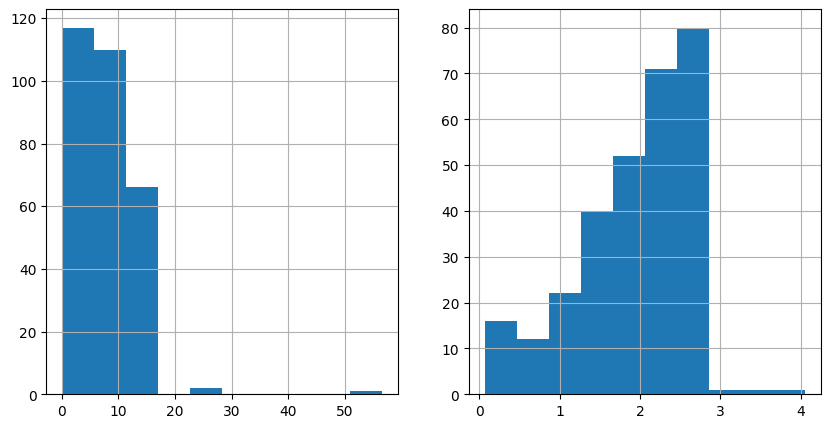

In [15]:
import matplotlib.pyplot as plt
feild = "avg_wind_speed"
fig, (ax_before, ax_after) = plt.subplots(1,2, figsize=(10,5))

data[feild].hist(ax=ax_before)
data[feild].apply(np.log1p).hist(ax=ax_after)


TypeError: 'tuple' object is not callable